<a href="https://colab.research.google.com/github/HelbertSousa/TrabalhoCalculoNumerico/blob/main/TrabalhoCalcNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


O trabalho tem como objetivo conseguir aplicar algoritmos numéricos aprendidos na disciplina de Calculo Númerico oferecida pela UNIFAL, tendo como professor o Dr. José Claudinei Ferreira.

# Aprendizado necessário


*   Linguagem R 
*   Identificação do polinômio
*   Ideia de raizes de polinômio
*   Leitura de gráficos de nivel
*   Minimização de Funções
*   Polinomio de Taylor
*   Método de Euler
*   Derivada de função
*   Gradiente de Função




# Desenvolvimento

Definição da função com número complexo para posteriormente ser utilizada no método de euler.



A função foi definida recebendo um vetor.

In [ ]:
polivet <- function(u){
  x = u[1]; y = u[2]; z = x + y*1i
  p = z ^ 5 + z + 1
  q = abs(p) ^ 2
  return(q)
}

Agora o polinomio será definido utilizando como parâmetros x e y.

Essa definição sera utilizada para transformação de 3D para 2D e usar funções de desenho de gráficos.

Declaração da Derivada do polinômio.

In [101]:
#Derivada do Polinomio:
Derivpolivet <- function(u){
  x = u[1]; y = u[2]; z = x + y*1i
  p = 5 * z ^ 4 + 1
  q = abs(p) ^ 2
  return(q)
}

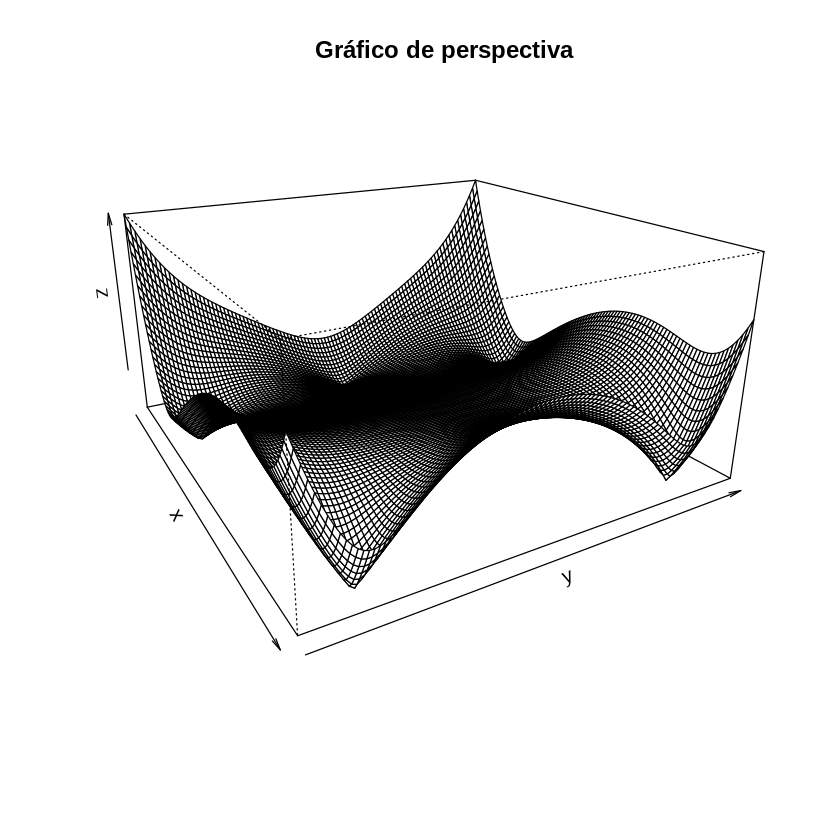

In [102]:
#Apenas para o gráfico
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Foi retirado a potência de 2 para melhor visualização
}

x <- seq(-2,2, by=0.05)
y <- seq(-2,2, by=0.05)


require(grDevices) # for trans3d
z <- outer(x, y, poli)
z[is.na(z)] <- 4
op <- par(bg = "white")
x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res


Lendo o gráfico de perspectiva, conseguimos visualizar 5 possiveis pontos de minimo que 
significam que o polinomio, nesse caso, apresenta 5 minimos que são raizes do mesmo.
isso vai de encontro com o Teorema da Existência e Unicidade de Solução de um PVI

Gráfico de Nível para encontrar possíveis candidatos a tempo inicial para facilitar o algoritmo de busca das raizes:

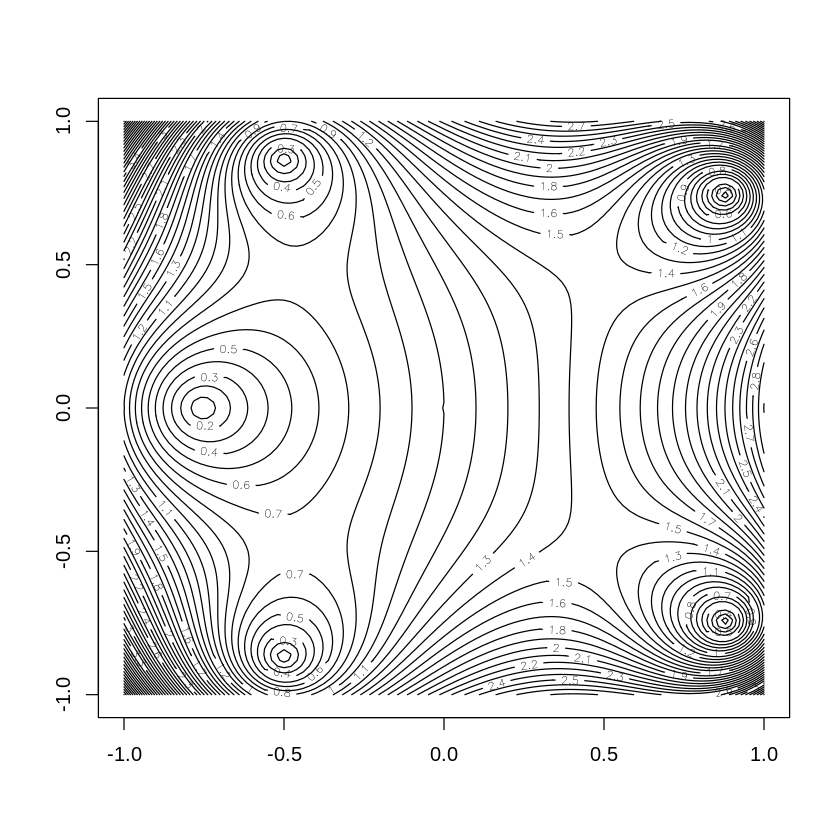

In [103]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 # Facilitar a visualização do gráfico
}
contour(x, y, z, nlevels = 50)

Até aqui, com o gráfico de perspectiva e o Teorema da Existência e Unicidade, percebemos que o polinomio terá 5 raizes.
Agora, com o gráfico de nível conseguimos saber onde estão essas raizes.
Assim, podemos indicar as condições iniciais proximas as curvas de nível que indica onde estão os pontos de minimo e possiveis raizes do polinomio.


#Seguindo os gráficos a escolha será:

* Coordenadas:

```
   X  |  Y
  -1  |  0
 -0.8 |  1
 -0,8 | -1
  0,8 |-0,8
  0,8 | 0,8 

```



```
r(x) = x^5 + x, q = -1 e p(x) = r(x) -q, com r(0) = 0 e r'(x) = 5 * x^5 + 1, com r'(0) não Nulo
```
```
Resolver a equação diferencial:
x'(q) = 1/r'(x(q)), com x(0) = 0, para estimar x(-1).

```
Definindo Euler para o polinômio:
```
Euler : y_(i+1) = y_i + h * F(t_i,y_i)
Em que: y'(t) = F(t,y(t))
```

# Demonstração das Raizes e Gráficos:

# Usando as coordenadas :  (-1,0)

Definição da Função Polinomial novamente para  inserir a potência de 2 e do Gradiente do polinomio que serão usados no método de Euler:

In [104]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 
}

In [105]:
gradpoli <- function(u){
  s = u[1]
  r = u[2]
  dx = (poli(s+h,r)-poli(s,r))/(2*h); 
  dy = (poli(s,r+h)-poli(s,r))/(2*h);
  
  return( c(dx,dy) )
}

In [106]:
#Euler: 
t0 = 0  # tempo inicial
tf = 5  # t final 
e0 = c(-1,0) # condição inicial 
n = 20000
h = (tf-t0) / n  # Tamanho do passo
h
tt=seq(t0,tf,by=h)

Y=matrix(0,2,length(tt))
Y[,1]=e0

for ( i in 1 : (length(tt) - 1)){
  Y[,i+1] = Y[,i] - h * gradpoli(Y[,i])
}
print("Aproximação para o ponto de mínimo"); Y[,length(tt)]
print("Aproximação para o valor mínimo"); poli(Y[1,length(tt)],Y[2,length(tt)])

[1] 0.00025

[1] "Aproximação para o ponto de mínimo"


[1] -0.7550026 -0.0001250

[1] "Aproximação para o valor mínimo"


[1] 2.151007e-07

In [107]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2
}

x = -0.755002615009711
y = -0.000124999999999992

poli(x,y)

[1] 2.151007e-07

Resultado : 0.000000215100694115359
Erro h = 0.00025

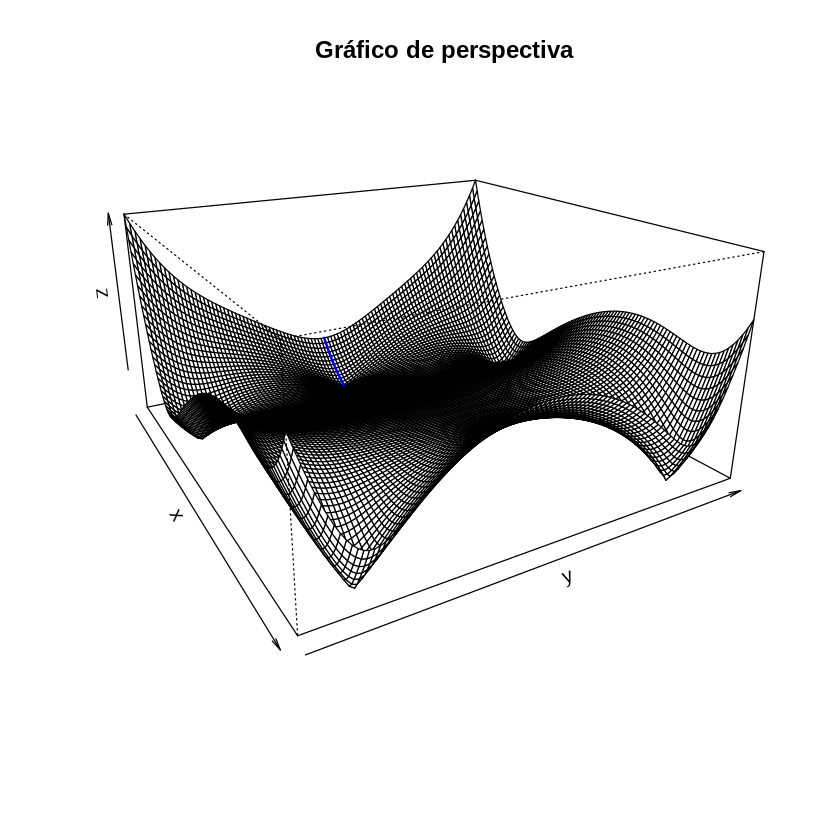

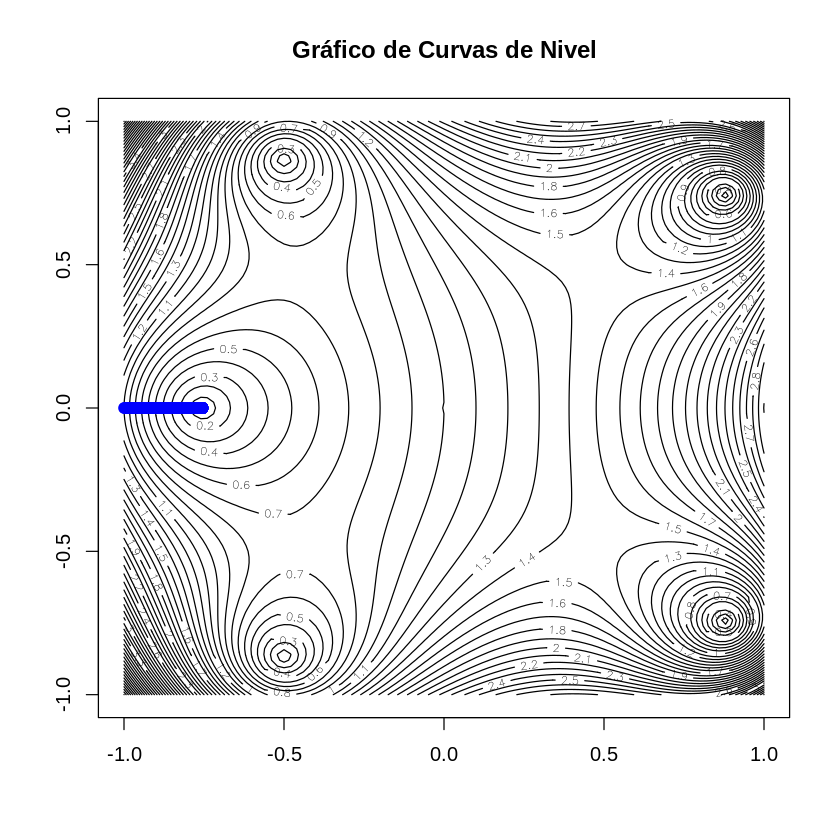

In [108]:
# Definindo novamente a função poli 
# para retirar a potência de 2 
# para melhor visualização do gráfico de curva de nivel.

poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Retirado:  ^ 2
}

x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res

lines(trans3d(Y[1,],Y[2,],poli(Y[1,],Y[2,]), res), col = "blue", lwd = 2) # Inclui curvas
contour(x, y, z, nlevels = 50)
title("Gráfico de Curvas de Nivel", font = 4)

points(Y[1,],Y[2,], col = "blue", lwd = 2) # Inclui curvas

# Usando as coordenadas :  (-0.8,1)

Definição da Função Polinomial novamente para  inserir a potência de 2 e do Gradiente do polinomio que serão usados no método de Euler:

In [109]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 
}

In [110]:
gradpoli <- function(u){
  s = u[1]
  r = u[2]
  dx = (poli(s+h,r)-poli(s,r))/(2*h); 
  dy = (poli(s,r+h)-poli(s,r))/(2*h);
  
  return( c(dx,dy) )
}

In [111]:
#Euler: 
t0 = 0  # tempo inicial
tf = 5  # t final 
e0 = c(-0.8,1) # condição inicial 
n = 20000
h = (tf-t0) / n  # Tamanho do passo
h
tt=seq(t0,tf,by=h)

Y=matrix(0,2,length(tt))
Y[,1]=e0

for ( i in 1 : (length(tt) - 1)){
  Y[,i+1] = Y[,i] - h * gradpoli(Y[,i])
}
print("Aproximação para o ponto de mínimo"); Y[,length(tt)]
print("Aproximação para o valor mínimo"); poli(Y[1,length(tt)],Y[2,length(tt)])

[1] 0.00025

[1] "Aproximação para o ponto de mínimo"


[1] -0.5001250  0.8659003

[1] "Aproximação para o valor mínimo"


[1] 6.562498e-07

In [112]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2
}

x = -0.500124977668457
y =  0.86590033935814

poli(x,y)

[1] 6.562498e-07

Resultado : 0.00000065624975163677
Erro h = 0.00025

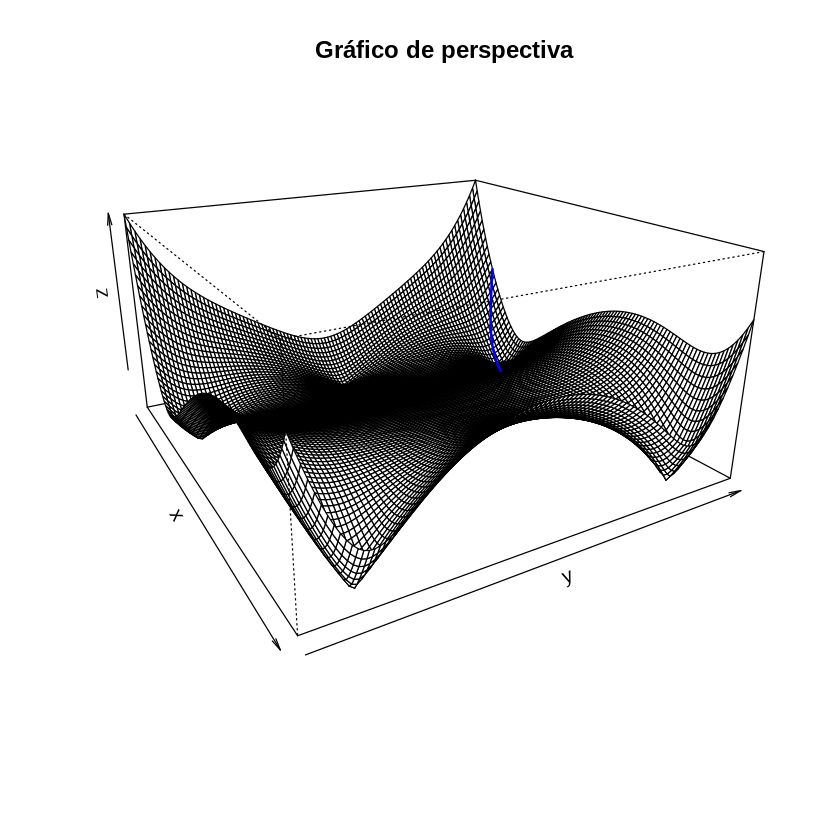

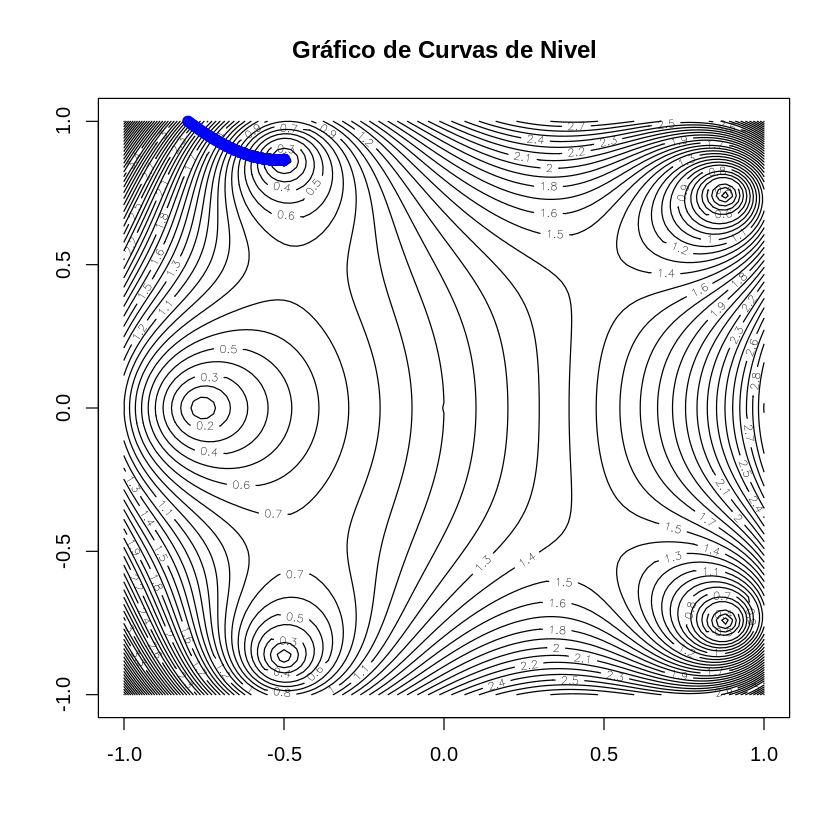

In [113]:
# Definindo novamente a função poli 
# para retirar a potência de 2 
# para melhor visualização do gráfico de curva de nivel.

poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Retirado:  ^ 2
}

x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res

lines(trans3d(Y[1,],Y[2,],poli(Y[1,],Y[2,]), res), col = "blue", lwd = 2) # Inclui curvas
contour(x, y, z, nlevels = 50)
title("Gráfico de Curvas de Nivel", font = 4)

points(Y[1,],Y[2,], col = "blue", lwd = 2) # Inclui curvas

# Usando as coordenadas :  (-0,8,-1)

Definição da Função Polinomial novamente para  inserir a potência de 2 e do Gradiente do polinomio que serão usados no método de Euler:

In [114]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 
}

In [115]:
gradpoli <- function(u){
  s = u[1]
  r = u[2]
  dx = (poli(s+h,r)-poli(s,r))/(2*h); 
  dy = (poli(s,r+h)-poli(s,r))/(2*h);
  
  return( c(dx,dy) )
}

In [116]:
#Euler: 
t0 = 0  # tempo inicial
tf = 5  # t final 
e0 = c(-0.8,-1) # condição inicial 
n = 20000
h = (tf-t0) / n  # Tamanho do passo
h
tt=seq(t0,tf,by=h)

Y=matrix(0,2,length(tt))
Y[,1]=e0

for ( i in 1 : (length(tt) - 1)){
  Y[,i+1] = Y[,i] - h * gradpoli(Y[,i])
}
print("Aproximação para o ponto de mínimo"); Y[,length(tt)]
print("Aproximação para o valor mínimo"); poli(Y[1,length(tt)],Y[2,length(tt)])

[1] 0.00025

[1] "Aproximação para o ponto de mínimo"


[1] -0.5001250 -0.8661503

[1] "Aproximação para o valor mínimo"


[1] 6.562499e-07

In [117]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2
}

x = -0.500124977688705
y = -0.86615033935813

poli(x,y)

[1] 6.562499e-07

Resultado : 0.000000656249857847623
Erro h = 0.00025

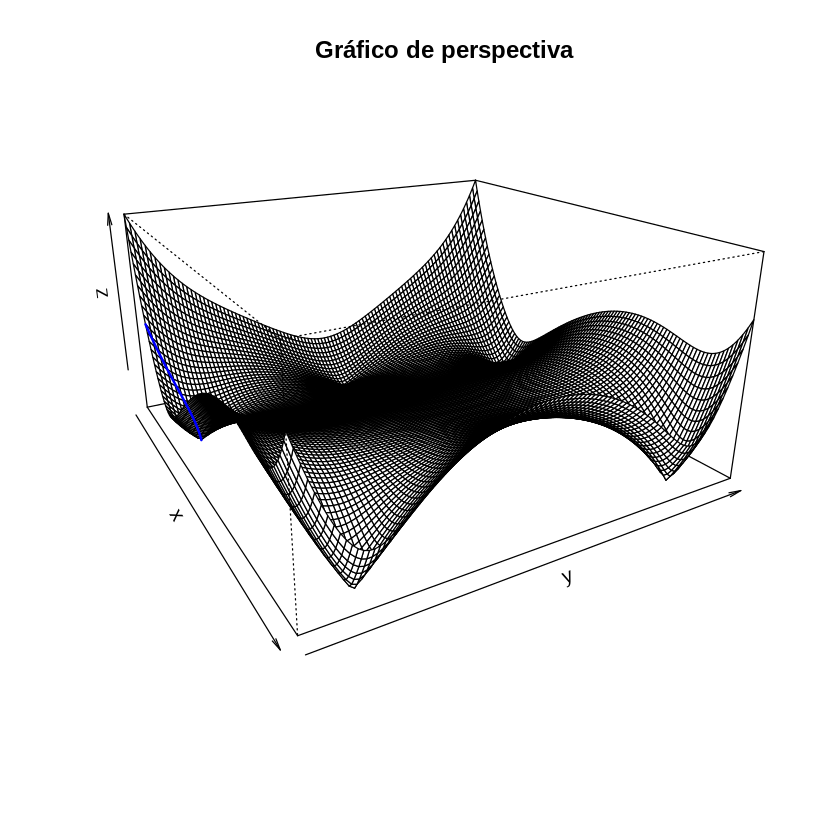

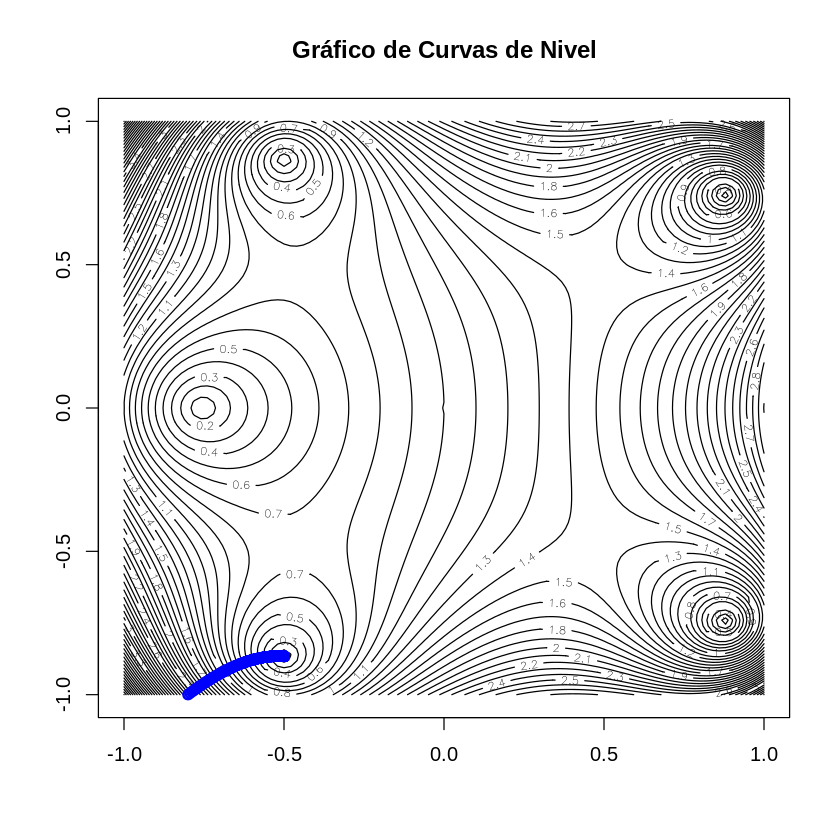

In [118]:
# Definindo novamente a função poli 
# para retirar a potência de 2 
# para melhor visualização do gráfico de curva de nivel.

poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Retirado:  ^ 2
}

x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res

lines(trans3d(Y[1,],Y[2,],poli(Y[1,],Y[2,]), res), col = "blue", lwd = 2) # Inclui curvas
contour(x, y, z, nlevels = 50)
title("Gráfico de Curvas de Nivel", font = 4)

points(Y[1,],Y[2,], col = "blue", lwd = 2) # Inclui curvas

# Usando as coordenadas :  (0.8,-0.8)

Definição da Função Polinomial novamente para  inserir a potência de 2 e do Gradiente do polinomio que serão usados no método de Euler:

In [119]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 
}

In [120]:
gradpoli <- function(u){
  s = u[1]
  r = u[2]
  dx = (poli(s+h,r)-poli(s,r))/(2*h); 
  dy = (poli(s,r+h)-poli(s,r))/(2*h);
  
  return( c(dx,dy) )
}

In [121]:
#Euler: 
t0 = 0  # tempo inicial
tf = 5  # t final 
e0 = c(0.8,-0.8) # condição inicial 
n = 20000
h = (tf-t0) / n  # Tamanho do passo
h
tt=seq(t0,tf,by=h)

Y=matrix(0,2,length(tt))
Y[,1]=e0

for ( i in 1 : (length(tt) - 1)){
  Y[,i+1] = Y[,i] - h * gradpoli(Y[,i])
}
print("Aproximação para o ponto de mínimo"); Y[,length(tt)]
print("Aproximação para o valor mínimo"); poli(Y[1,length(tt)],Y[2,length(tt)])

[1] 0.00025

[1] "Aproximação para o ponto de mínimo"


[1]  0.8773138 -0.7449867

[1] "Aproximação para o valor mínimo"


[1] 1.917696e-06

In [122]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2
}

x = 0.877313785199184
y = -0.744986729170835

poli(x,y)

[1] 1.917696e-06

Resultado : 0.00000191769620407539
Erro h = 0.00025

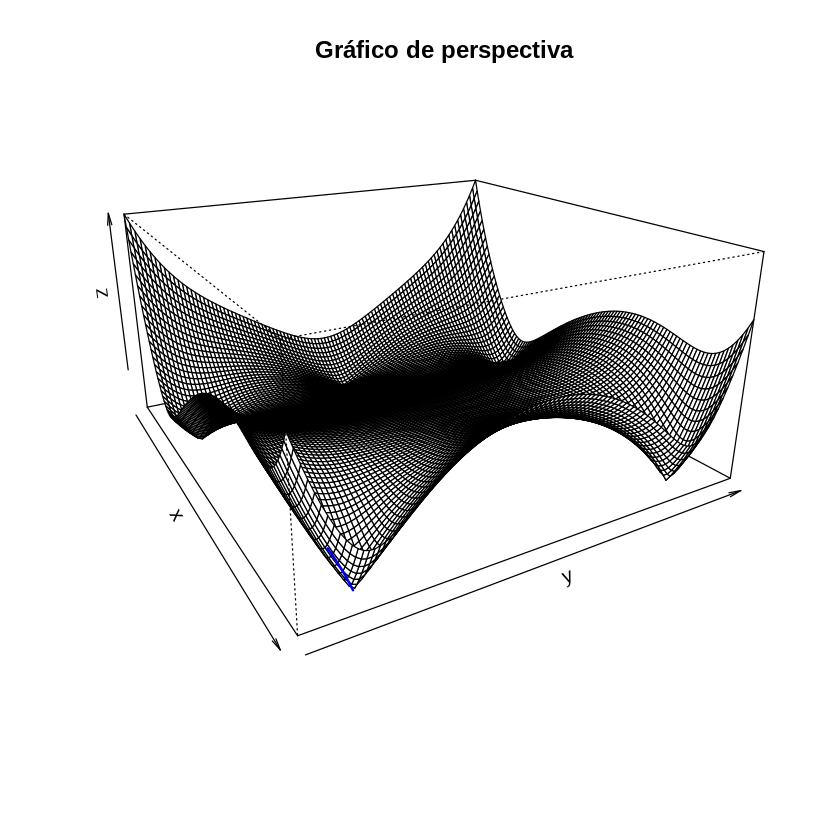

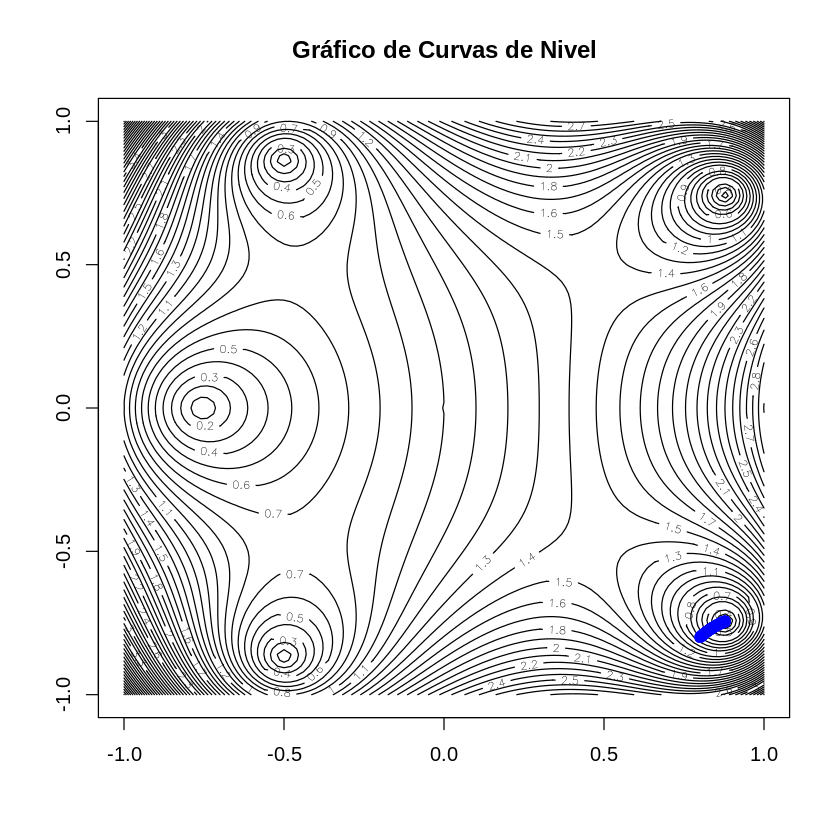

In [123]:
# Definindo novamente a função poli 
# para retirar a potência de 2 
# para melhor visualização do gráfico de curva de nivel.

poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Retirado:  ^ 2
}

x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res

lines(trans3d(Y[1,],Y[2,],poli(Y[1,],Y[2,]), res), col = "blue", lwd = 2) # Inclui curvas
contour(x, y, z, nlevels = 50)
title("Gráfico de Curvas de Nivel", font = 4)

points(Y[1,],Y[2,], col = "blue", lwd = 2) # Inclui curvas

# Usando as coordenadas :  (0.8,0.8)

Definição da Função Polinomial novamente para  inserir a potência de 2 e do Gradiente do polinomio que serão usados no método de Euler:

In [124]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2 
}

In [125]:
gradpoli <- function(u){
  s = u[1]
  r = u[2]
  dx = (poli(s+h,r)-poli(s,r))/(2*h); 
  dy = (poli(s,r+h)-poli(s,r))/(2*h);
  
  return( c(dx,dy) )
}

In [126]:
#Euler: 
t0 = 0  # tempo inicial
tf = 5  # t final 
e0 = c(0.8,0.8) # condição inicial 
n = 20000
h = (tf-t0) / n  # Tamanho do passo
h
tt=seq(t0,tf,by=h)

Y=matrix(0,2,length(tt))
Y[,1]=e0

for ( i in 1 : (length(tt) - 1)){
  Y[,i+1] = Y[,i] - h * gradpoli(Y[,i])
}
print("Aproximação para o ponto de mínimo"); Y[,length(tt)]
print("Aproximação para o valor mínimo"); poli(Y[1,length(tt)],Y[2,length(tt)])

[1] 0.00025

[1] "Aproximação para o ponto de mínimo"


[1] 0.8773138 0.7447367

[1] "Aproximação para o valor mínimo"


[1] 1.917697e-06

In [127]:
poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) ^ 2
}

x = 0.877313785167621
y = 0.744736729170825

poli(x,y)

[1] 1.917697e-06

Resultado : 0.00000191769668800903
Erro h = 0.00025

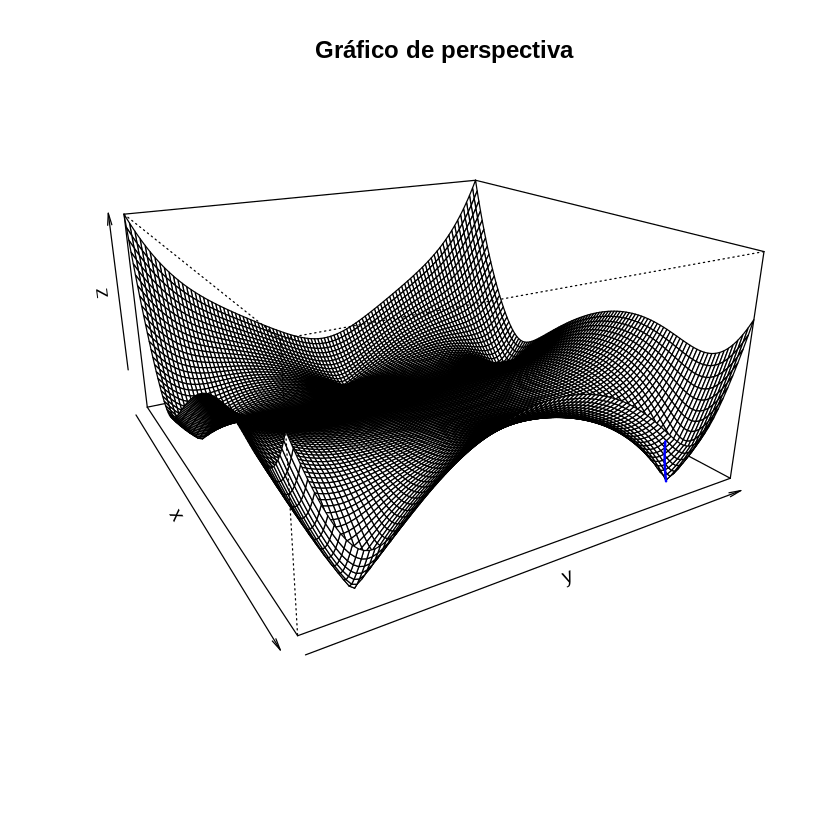

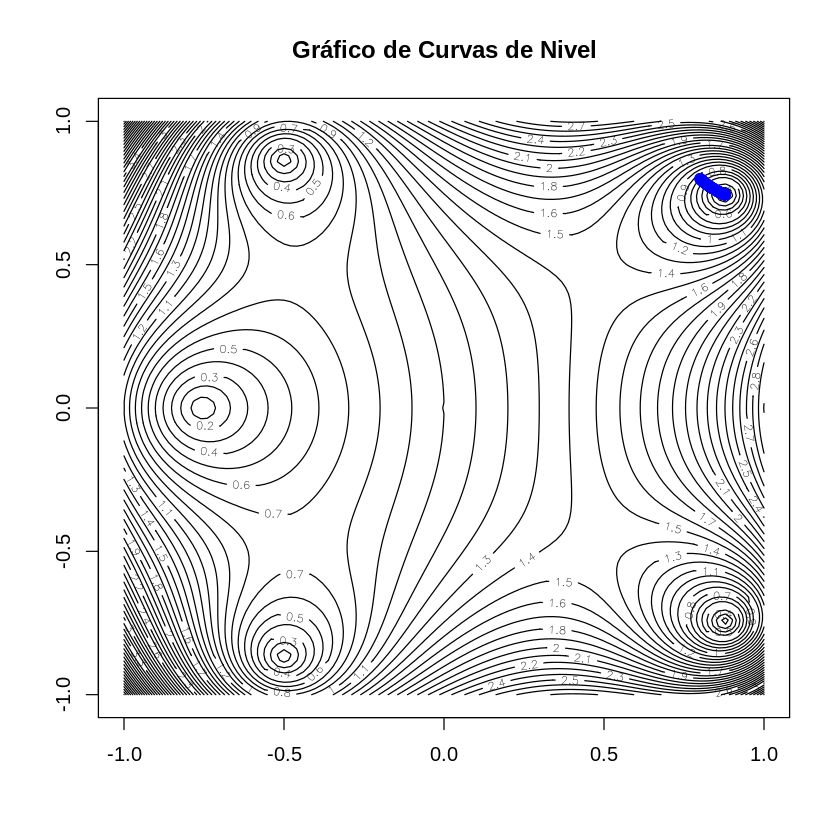

In [128]:
# Definindo novamente a função poli 
# para retirar a potência de 2 
# para melhor visualização do gráfico de curva de nivel.

poli<- function(x,y){
  z<- x + y * 1i; 
  w <- z^5 + z + 1; 
  Mod(w) # Retirado:  ^ 2
}

x <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada x
y <- seq(-1, 1, by = 0.02) # Criando a sequência da coordenada y
z <- outer(x, y, poli) # avaliando o grafico e obtenção da coordenada z
persp(x, y, z, theta = 60, phi = 20, expand = 0.5, main = "Gráfico de perspectiva")->res

lines(trans3d(Y[1,],Y[2,],poli(Y[1,],Y[2,]), res), col = "blue", lwd = 2) # Inclui curvas
contour(x, y, z, nlevels = 50)
title("Gráfico de Curvas de Nivel", font = 4)

points(Y[1,],Y[2,], col = "blue", lwd = 2) # Inclui curvas

# Conclusão

Como demonstrado nesse Colab a primeira parte da matéria que está sendo avaliada foi concluida e aprendida com sucesso.

Agradecimento especial ao professor Claudinei que teve paciência suficiente para explicar diversas vezes o método e a aplicação no polinomio que foi pedido.